In [1]:
# IMPORT MODULES

import numpy as np
from numpy import ma
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline
from matplotlib import ticker, cm
from matplotlib.pyplot import figure
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets, decomposition, preprocessing

from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score, confusion_matrix, classification_report, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM

from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

Using TensorFlow backend.


(37229, 9)
Index(['Time', 'Class', 'Ci', 'Ti', 'T', 'Qc', 'Tci', 'Tc', 'C'], dtype='object')


/opt/anaconda3/envs/Autoencoder/lib/python3.6/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


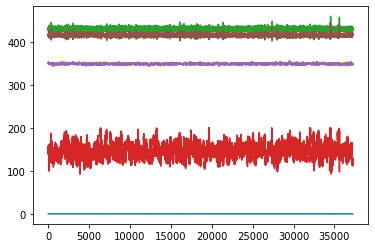

In [2]:
dfRaw = pd.read_excel('Model data.xlsx',engine='openpyxl')
df=dfRaw
print(dfRaw.shape)
print(dfRaw.columns)


d=dfRaw.iloc[:,2:8]

plt.plot(d)
plt.show()

In [3]:
data = dfRaw.copy()
normal_data = data.loc[data["Class"] == 0]
fault_data = data.loc[data["Class"] == 1]

print("data ", data.shape)
print("normal_data ", normal_data.shape)
print("fault data ", fault_data.shape)
print("Percent fault ", round((len(fault_data)/len(data)), 4),"%")


data  (37229, 9)
normal_data  (37229, 9)
fault data  (0, 9)
Percent fault  0.0 %


/opt/anaconda3/envs/Autoencoder/lib/python3.6/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


7
Train on 33506 samples, validate on 3723 samples
Epoch 1/20
33506/33506 [==============================] - 3s 87us/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 2/20
33506/33506 [==============================] - 2s 62us/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 3/20
33506/33506 [==============================] - 2s 64us/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 4/20
33506/33506 [==============================] - 2s 64us/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 5/20
33506/33506 [==============================] - 2s 63us/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 6/20
33506/33506 [==============================] - 2s 63us/step - loss: 0.0023 - mean_squared_error: 0.0023

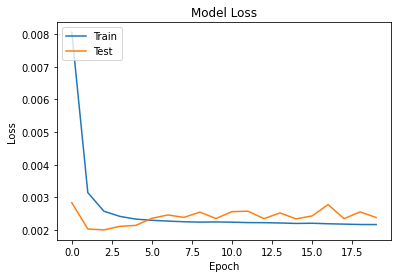

NameError: name 'inputs' is not defined

In [4]:

import tensorflow as tf
import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets, decomposition, preprocessing





df = pd.read_excel('Model data.xlsx',engine='openpyxl')
# all features
x = df[df.columns[2:9]].to_numpy()

# column with class
y = df[df.columns[1]].to_numpy()


# This portion of code remove anomalies if the dataset contained anomalies

df = pd.concat([pd.DataFrame(x), pd.DataFrame({'anomaly': y})], axis=1)
normal_events = df[df['anomaly'] == 0]


normal_events = normal_events.loc[:, normal_events.columns != 'anomaly']




# # scaling
scaler = preprocessing.MinMaxScaler()

scaler.fit(df.drop('anomaly', 1))

scaled_data = scaler.transform(normal_events)

# # 80% percent of dataset is designated to training
train_data, test_data = train_test_split(scaled_data, test_size=0.1)

n_features = x.shape[1]

print(n_features)
# # model
# Add LSTM layers in encoder
encoder = keras.Sequential(name='encoder')
encoder.add(layer=keras.layers.Dense(units=20, activation=keras.activations.relu, input_shape=[n_features]))
encoder.add(keras.layers.Dropout(0.1))
encoder.add(layer=keras.layers.Dense(units=10, activation=keras.activations.relu))
encoder.add(layer=keras.layers.Dense(units=5, activation=keras.activations.relu))

decoder = keras.Sequential(name='decoder')
decoder.add(layer=keras.layers.Dense(units=10, activation=keras.activations.relu, input_shape=[5]))
decoder.add(layer=keras.layers.Dense(units=20, activation=keras.activations.relu))
decoder.add(keras.layers.Dropout(0.1))
decoder.add(layer=keras.layers.Dense(units=n_features, activation=keras.activations.sigmoid))

autoencoder = keras.Sequential([encoder, decoder])

autoencoder.compile(
	loss=keras.losses.MSE,
	optimizer=keras.optimizers.Adam(),
	metrics=[keras.metrics.mean_squared_error])

# train model
es = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=20, restore_best_weights=True)
history = autoencoder.fit(x=train_data, y=train_data, epochs=20, verbose=1, validation_data=[test_data, test_data], callbacks=[es])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



/opt/anaconda3/envs/Autoencoder/lib/python3.6/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


Train on 33506 samples, validate on 3723 samples
Epoch 1/20
33506/33506 [==============================] - 2s 53us/sample - loss: 0.0150 - accuracy: 0.4287 - val_loss: 0.0043 - val_accuracy: 0.5095
Epoch 2/20
33506/33506 [==============================] - 1s 37us/sample - loss: 0.0033 - accuracy: 0.6372 - val_loss: 0.0024 - val_accuracy: 0.7397
Epoch 3/20
33506/33506 [==============================] - 1s 37us/sample - loss: 8.1400e-04 - accuracy: 0.8294 - val_loss: 3.0840e-04 - val_accuracy: 0.8746
Epoch 4/20
33506/33506 [==============================] - 1s 37us/sample - loss: 2.8688e-04 - accuracy: 0.8681 - val_loss: 2.6343e-04 - val_accuracy: 0.8740
Epoch 5/20
33506/33506 [==============================] - 1s 37us/sample - loss: 2.6251e-04 - accuracy: 0.8694 - val_loss: 2.4595e-04 - val_accuracy: 0.8802
Epoch 6/20
33506/33506 [==============================] - 1s 38us/sample - loss: 2.5060e-04 - accuracy: 0.8708 - val_loss: 2.6081e-04 - val_accuracy: 0.8668
Epoch 7/20
33506/33506 [=

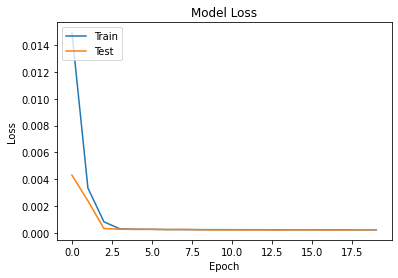

In [21]:

import tensorflow as tf
import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets, decomposition, preprocessing

from keras.callbacks import ModelCheckpoint, TensorBoard



df = pd.read_excel('Model data.xlsx',engine='openpyxl')
# all features
x = df[df.columns[2:9]].to_numpy()

# column with class
y = df[df.columns[1]].to_numpy()


# This portion of code remove anomalies if the dataset contained anomalies

df = pd.concat([pd.DataFrame(x), pd.DataFrame({'anomaly': y})], axis=1)
normal_events = df[df['anomaly'] == 0]


normal_events = normal_events.loc[:, normal_events.columns != 'anomaly']




# # scaling
scaler = preprocessing.MinMaxScaler()

scaler.fit(df.drop('anomaly', 1))

scaled_data = scaler.transform(normal_events)

# # 80% percent of dataset is designated to training
train_data, test_data = train_test_split(scaled_data, test_size=0.1)

n_features = x.shape[1]

train_x=train_data
test_x=test_data
nb_epoch = 100
batch_size = 128
input_dim = train_x.shape[1] #num of columns, 30
encoding_dim = 14
hidden_dim = int(encoding_dim / 2) #i.e. 7
learning_rate = 1e-7

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(hidden_dim, activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

cp = ModelCheckpoint(filepath="autoencoder_fraud.h5",
                               save_best_only=True,
                               verbose=0)

tb = TensorBoard(log_dir='./logs',
                histogram_freq=0,
                write_graph=True,
                write_images=True)





autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

# history = autoencoder.fit(train_x, train_x,
#                     epochs=nb_epoch,
#                     batch_size=batch_size,
#                     shuffle=True,
#                     validation_data=(test_x, test_x),
#                     verbose=0,
#                     callbacks=[cp, tb]).history


history = autoencoder.fit(x=train_x, y=train_x, epochs=20, verbose=1, validation_data=[test_x, test_x], callbacks=[es])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()





# test_x_predictions = autoencoder.predict(test_x)
# mse = np.mean(np.power(test_x - test_x_predictions, 2), axis=1)
# error_df = pd.DataFrame({'Reconstruction_error': mse})
# error_df.describe()




/opt/anaconda3/envs/Autoencoder/lib/python3.6/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


------------------------------------------------------------------------
Training for fold 0 ...
Train on 29783 samples, validate on 3723 samples
Epoch 1/50
29783/29783 [==============================] - 3s 91us/step - loss: 0.0078 - mean_squared_error: 0.0078 - accuracy: 0.4776 - val_loss: 0.0027 - val_mean_squared_error: 0.0027 - val_accuracy: 0.7123
Epoch 2/50
29783/29783 [==============================] - 2s 65us/step - loss: 0.0029 - mean_squared_error: 0.0029 - accuracy: 0.6828 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_accuracy: 0.7908
Epoch 3/50
29783/29783 [==============================] - 2s 65us/step - loss: 0.0021 - mean_squared_error: 0.0021 - accuracy: 0.7287 - val_loss: 0.0012 - val_mean_squared_error: 0.0012 - val_accuracy: 0.7953
Epoch 4/50
29783/29783 [==============================] - 2s 65us/step - loss: 0.0018 - mean_squared_error: 0.0018 - accuracy: 0.7490 - val_loss: 9.0565e-04 - val_mean_squared_error: 9.0565e-04 - val_accuracy: 0.8112
Epoch 5/50

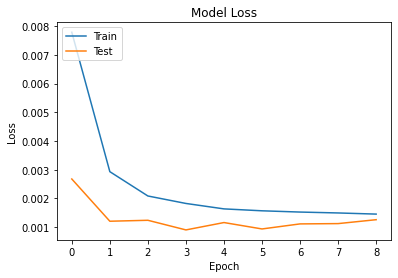

------------------------------------------------------------------------
Training for fold 1 ...
Train on 29783 samples, validate on 3723 samples
Epoch 1/50
29783/29783 [==============================] - 3s 91us/step - loss: 0.0088 - mean_squared_error: 0.0088 - accuracy: 0.4292 - val_loss: 0.0046 - val_mean_squared_error: 0.0046 - val_accuracy: 0.5646
Epoch 2/50
29783/29783 [==============================] - 2s 64us/step - loss: 0.0044 - mean_squared_error: 0.0044 - accuracy: 0.6143 - val_loss: 0.0020 - val_mean_squared_error: 0.0020 - val_accuracy: 0.7639
Epoch 3/50
29783/29783 [==============================] - 2s 65us/step - loss: 0.0030 - mean_squared_error: 0.0030 - accuracy: 0.7131 - val_loss: 0.0019 - val_mean_squared_error: 0.0019 - val_accuracy: 0.7789
Epoch 4/50
29783/29783 [==============================] - 2s 66us/step - loss: 0.0028 - mean_squared_error: 0.0028 - accuracy: 0.7212 - val_loss: 0.0017 - val_mean_squared_error: 0.0017 - val_accuracy: 0.7824
Epoch 5/50
29783/2

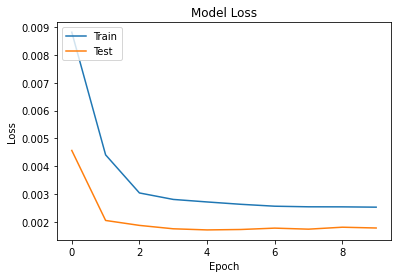

------------------------------------------------------------------------
Training for fold 2 ...
Train on 29783 samples, validate on 3723 samples
Epoch 1/50
29783/29783 [==============================] - 3s 94us/step - loss: 0.0089 - mean_squared_error: 0.0089 - accuracy: 0.4337 - val_loss: 0.0047 - val_mean_squared_error: 0.0047 - val_accuracy: 0.5654
Epoch 2/50
29783/29783 [==============================] - 2s 66us/step - loss: 0.0051 - mean_squared_error: 0.0051 - accuracy: 0.5666 - val_loss: 0.0043 - val_mean_squared_error: 0.0043 - val_accuracy: 0.6033
Epoch 3/50
29783/29783 [==============================] - 2s 67us/step - loss: 0.0048 - mean_squared_error: 0.0048 - accuracy: 0.5877 - val_loss: 0.0042 - val_mean_squared_error: 0.0042 - val_accuracy: 0.5885
Epoch 4/50
29783/29783 [==============================] - 2s 67us/step - loss: 0.0046 - mean_squared_error: 0.0046 - accuracy: 0.5904 - val_loss: 0.0044 - val_mean_squared_error: 0.0044 - val_accuracy: 0.5984
Epoch 5/50
29783/2

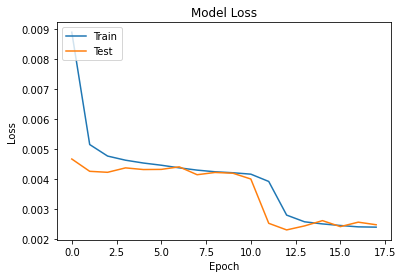

------------------------------------------------------------------------
Training for fold 3 ...
Train on 29783 samples, validate on 3723 samples
Epoch 1/50
29783/29783 [==============================] - 3s 92us/step - loss: 0.0076 - mean_squared_error: 0.0076 - accuracy: 0.4710 - val_loss: 0.0029 - val_mean_squared_error: 0.0029 - val_accuracy: 0.6986
Epoch 2/50
29783/29783 [==============================] - 2s 65us/step - loss: 0.0035 - mean_squared_error: 0.0035 - accuracy: 0.6722 - val_loss: 0.0020 - val_mean_squared_error: 0.0020 - val_accuracy: 0.7652
Epoch 3/50
29783/29783 [==============================] - 2s 65us/step - loss: 0.0025 - mean_squared_error: 0.0025 - accuracy: 0.7256 - val_loss: 8.6175e-04 - val_mean_squared_error: 8.6175e-04 - val_accuracy: 0.8337
Epoch 4/50
29783/29783 [==============================] - 2s 65us/step - loss: 0.0021 - mean_squared_error: 0.0021 - accuracy: 0.7411 - val_loss: 6.5853e-04 - val_mean_squared_error: 6.5853e-04 - val_accuracy: 0.8445
Ep

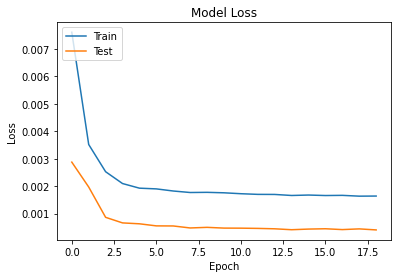

------------------------------------------------------------------------
Training for fold 4 ...
Train on 29784 samples, validate on 3723 samples
Epoch 1/50
29784/29784 [==============================] - 3s 93us/step - loss: 0.0081 - mean_squared_error: 0.0081 - accuracy: 0.4393 - val_loss: 0.0048 - val_mean_squared_error: 0.0048 - val_accuracy: 0.5592
Epoch 2/50
29784/29784 [==============================] - 2s 64us/step - loss: 0.0052 - mean_squared_error: 0.0052 - accuracy: 0.5117 - val_loss: 0.0045 - val_mean_squared_error: 0.0045 - val_accuracy: 0.5560
Epoch 3/50
29784/29784 [==============================] - 2s 64us/step - loss: 0.0050 - mean_squared_error: 0.0050 - accuracy: 0.5273 - val_loss: 0.0046 - val_mean_squared_error: 0.0046 - val_accuracy: 0.5700
Epoch 4/50
29784/29784 [==============================] - 2s 65us/step - loss: 0.0048 - mean_squared_error: 0.0048 - accuracy: 0.5513 - val_loss: 0.0043 - val_mean_squared_error: 0.0043 - val_accuracy: 0.5933
Epoch 5/50
29784/2

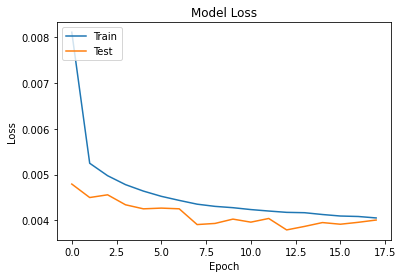

NameError: name 'fold_no' is not defined

In [23]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


from sklearn.model_selection import train_test_split
import sklearn
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import decomposition
import scipy


from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets, decomposition, preprocessing
from sklearn.model_selection import KFold


df = pd.read_excel('Model data.xlsx',engine='openpyxl')
# all features
x = df[df.columns[2:9]].to_numpy()

# column with class
y = df[df.columns[1]].to_numpy()


# This portion of code remove anomalies if the dataset contained anomalies

df = pd.concat([pd.DataFrame(x), pd.DataFrame({'anomaly': y})], axis=1)
normal_events = df[df['anomaly'] == 0]


normal_events = normal_events.loc[:, normal_events.columns != 'anomaly']




# # scaling
scaler = preprocessing.MinMaxScaler()

scaler.fit(df.drop('anomaly', 1))

scaled_data = scaler.transform(normal_events)

# # 80% percent of dataset is designated to training
train_data, test_data = train_test_split(scaled_data, test_size=0.1)
n_features = x.shape[1]

inputs = np.concatenate((train_data, test_data), axis=0)


# Define the K-fold Cross Validator
num_folds=5
kfold = KFold(n_splits=num_folds, shuffle=True)


prediction_loss_error=[]

i=0

for train, test in kfold.split(inputs):
    
    # # model
    encoder = keras.Sequential(name='encoder')
    encoder.add(layer=keras.layers.Dense(units=20, activation=keras.activations.relu, input_shape=[n_features]))
    encoder.add(keras.layers.Dropout(0.1))
    encoder.add(layer=keras.layers.Dense(units=10, activation=keras.activations.relu))
    encoder.add(layer=keras.layers.Dense(units=5, activation=keras.activations.relu))

    decoder = keras.Sequential(name='decoder')
    decoder.add(layer=keras.layers.Dense(units=10, activation=keras.activations.relu, input_shape=[5]))
    decoder.add(layer=keras.layers.Dense(units=20, activation=keras.activations.relu))
    decoder.add(keras.layers.Dropout(0.1))
    decoder.add(layer=keras.layers.Dense(units=n_features, activation=keras.activations.sigmoid))

    autoencoder = keras.Sequential([encoder, decoder])

    autoencoder.compile(
        loss=keras.losses.MSE,
        optimizer=keras.optimizers.Adam(),
        metrics=[keras.metrics.mean_squared_error,'accuracy'])
    

    # train model
    es = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=5, restore_best_weights=True)
#     history = autoencoder.fit(x=train_data, y=train_data, epochs=100, verbose=1, validation_data=[test_data, test_data], callbacks=[es])
    
    
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {i} ...')

    # Fit data to model
    history = autoencoder.fit(x=inputs[train], y=inputs[train], epochs=50, verbose=1, validation_data=[test_data, test_data], callbacks=[es])
    
    
    # Mean Squared error
    train_predicted_x = autoencoder.predict(x=inputs[train])
    train_events_mse=sklearn.metrics.mean_squared_error(inputs[train], train_predicted_x)
    prediction_loss_error.append(train_events_mse)
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    i=i+1


# Increase fold number
fold_no = fold_no + 1

print(f'> Loss: {np.mean(prediction_loss_error)}')

/opt/anaconda3/envs/Autoencoder/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


MSE
0.011837686644867063
0.004008957


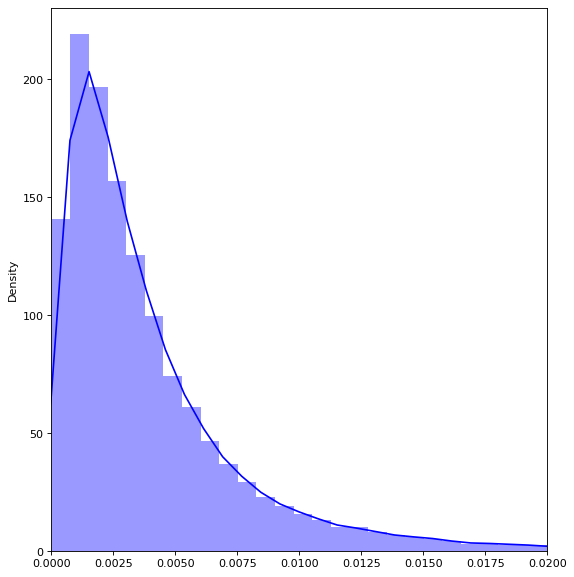

In [24]:

# Mean Squared error
train_predicted_x = autoencoder.predict(x=train_data)
train_events_mse = keras.losses.mean_squared_error(train_data, train_predicted_x)
cut_off = np.percentile(train_events_mse, 95)

# loss distribution

plt.figure(figsize=(8,9), dpi=80)
sns.distplot(train_events_mse, bins=200, kde=True, color='blue')
plt.xlim([0., .02]);


print('MSE')
print(cut_off)
print(np.average(train_events_mse.numpy()))



# # Mean Absolute error
# train_predicted_x = autoencoder.predict(x=train_data)
# train_events_mae = keras.losses.mean_absolute_percentage_error(train_data, train_predicted_x)
# cut_off = np.percentile(train_events_mae, 95)


# # loss distribution

# plt.figure(figsize=(8,9), dpi=80)
# sns.distplot(train_events_mae, bins=2000, kde=True, color='blue')
# plt.xlim([0., 50000]);


# print('')
# print('MAE')
# print(cut_off)
# print(np.average(train_events_mae.numpy()))


# # Mean Log error
# train_predicted_x = autoencoder.predict(x=train_data)
# train_events_mle = keras.losses.mean_squared_logarithmic_error(train_data, train_predicted_x)
# cut_off = np.percentile(train_events_mle, 95)

# # loss distribution

# plt.figure(figsize=(8,9), dpi=80)
# sns.distplot(train_events_mle, bins=200, kde=True, color='blue')
# plt.xlim([0., .02]);

# print('')
# print('MLE')
# print(cut_off)
# print(np.average(train_events_mle.numpy()))



            Ci          Ti         C           T          Qc         Tci  \
0     1.030513  350.778527  0.099384  430.871209  148.814799  348.613714   
1     1.029564  351.255911  0.101274  430.910049  149.201249  348.280896   
2     1.028076  351.089261  0.102826  430.415965  146.385718  348.522685   
3     1.027996  351.399371  0.097840  431.518419  147.980219  348.537786   
4     1.029284  350.949416  0.093054  432.535963  156.651259  348.421418   
...        ...         ...       ...         ...         ...         ...   
1196  0.978220  349.732360  0.091048  432.097287  199.713339  350.140448   
1197  0.977618  349.310307  0.084909  433.985044  200.333432  350.338977   
1198  0.976726  349.876704  0.082744  434.426010  200.289803  350.519770   
1199  0.977003  349.574596  0.082439  434.626850  200.417551  350.709570   
1200  0.965837  350.278277  0.080900  434.972682  199.592563  347.787641   

              Tc  
0     416.838537  
1     416.193713  
2     415.976322  
3     417.2

/opt/anaconda3/envs/Autoencoder/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


''

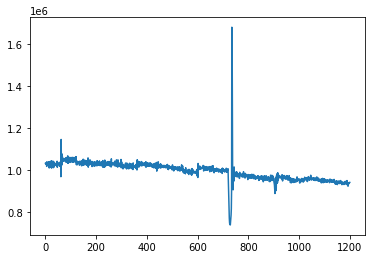

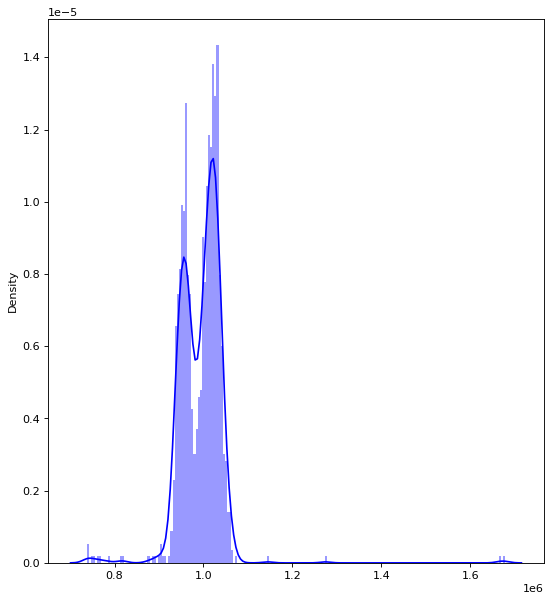

In [19]:
# Import dataset whihc has a fault to be detected

df = pd.read_excel('Fault 40.xlsx',engine='openpyxl')
# df=df.iloc[:,2:8]
# plt.plot(df)




plot_samples=1201
# all features
x = df[df.columns[2:9]].to_numpy()
print(df[df.columns[2:9]])
print(x.shape[1])
# column with class
y = df[df.columns[1]].to_numpy()



# Creating a data frame and calling the class "Anomaly"
abnormal_events = pd.concat([pd.DataFrame(x), pd.DataFrame({'anomaly': y})], axis=1)
abnormal_events = abnormal_events.loc[:, abnormal_events.columns != 'anomaly']

# abnormal event
abnormal_x = scaler.transform(abnormal_events).reshape(plot_samples, n_features)
predicted_x = autoencoder.predict(abnormal_x)
abnormal_events_mse = keras.losses.mean_squared_error(abnormal_x, predicted_x)
abnormal_events_df = pd.DataFrame({
    
	'n': np.arange(0, plot_samples),    
	'mse': abnormal_events_mse})


Final=pd.DataFrame(abnormal_events_df.mse)

Final['cutoff']=0.001

print(Final)
plt.plot(abnormal_events_df.mse)


# abnormal_events_df.to_excel('test4.xlsx')


plt.figure(figsize=(8,9), dpi=80)
sns.distplot(abnormal_events_mse, bins=200, kde=True, color='blue')
;

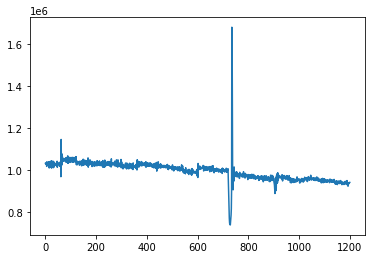

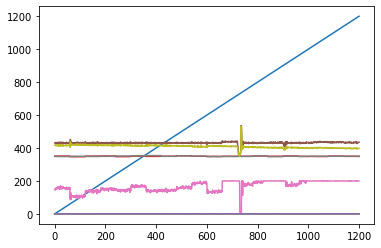

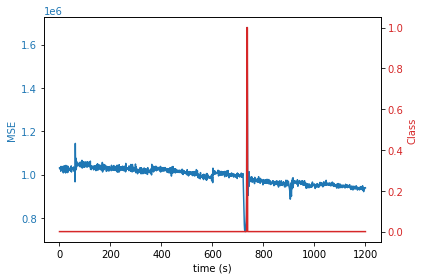

In [20]:
import numpy as np
import matplotlib.pyplot as plt



plt.plot(abnormal_events_df.mse)
plt.show()
df = pd.read_excel('Fault 40.xlsx',engine='openpyxl')
plt.plot(df)
plt.show()


df=df.Class
data1 = abnormal_events_mse
data2 = df

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('MSE', color=color)
ax1.plot(data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Class', color=color)  # we already handled the x-label with ax1
ax2.plot(data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()